In [23]:
from IPython.display import display, Image

import cv2 
import base64
import time
from openai import OpenAI

client = OpenAI()

# 视频读取
使用cv2读取视频，并且抽帧后转成base64编码数据

In [12]:
video = cv2.VideoCapture("data/tom_and_jerry.mp4")
base64Frames = []

fps = video.get(cv2.CAP_PROP_FPS)

frame_jump = int(fps)
frame_count = 0

# 定义目标尺寸
target_width = 640
target_height = 320

while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    # 一秒钟保存一帧
    if frame_count % frame_jump == 0:
        resized_frame = cv2.resize(frame, (target_width, target_height))
        _, buffer = cv2.imencode(".jpg", resized_frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
    frame_count += 1
video.release()
print(len(base64Frames), "frames read.")

89 frames read.


# 视频展示
这里差不多2倍速播放视频

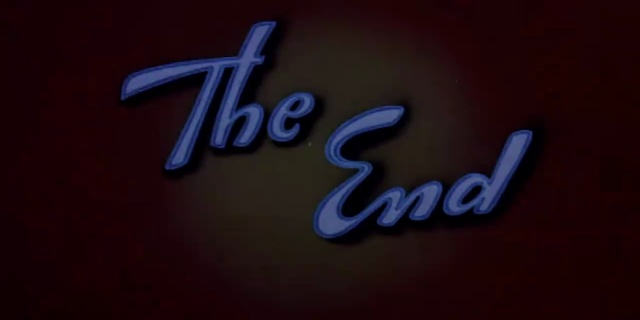

In [13]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.5)

# 定义视频处理方法

In [21]:
def vision(frames):
    PROMPT_MESSAGES = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": 
    f"""
    这些图片是从视频中按先后顺序截取出来的，截取的时间间隔是1s，总共{len(frames)}张，请根据这些画面信息，用中文详细描述下视频的剧情。
    """
                },
                *[{
                    "type": "image_url",
                    "image_url": {
                        "url": 'data:image/jpeg;base64,' + frame,
                    }
                } for frame in frames]
            ],
        },
    ]
    
    params = {
        "model": "gpt-4o",
        "messages": PROMPT_MESSAGES,
        "max_tokens": 2000,
        "temperature": 0.7
    }
    result = client.chat.completions.create(**params)
    return result.choices[0].message.content

In [22]:
print(vision(base64Frames))

这段视频似乎是汤姆和杰瑞的经典动画片。

剧情开始时，一个女人正在用扫帚打扫地板，她穿着高跟鞋。接着，一只小白鼠（可能是杰瑞的朋友）出现在扫帚旁边。随后，汤姆猫出现，试图用扫帚抓住小白鼠，但小白鼠灵活地避开了。

然后，汤姆展开追逐，抓住了小白鼠，但杰瑞及时赶到，与汤姆展开对抗。汤姆试图打开一个门，但被困在了门后。女人用扫帚打了汤姆的头，并责备他为什么还在找麻烦。

汤姆用手指着小白鼠，试图证明自己的行为是正当的，但女人显然不买账。汤姆因此被赶出屋外，并浑身沾满油漆。小白鼠发现了一瓶鞋油，似乎在计划什么。

最后，汤姆装扮成白色的猫，试图重新回到屋内，并假装自己是“会跳舞的猫”。女人对他的伎俩似乎感到满意，进行了表扬，但小白鼠却看穿了汤姆的伪装。视频以汤姆和小白鼠的搞笑互动结束，最后画面出现“结束”的字样。

总体来看，这段视频展示了汤姆和杰瑞的经典追逐和幽默桥段，充满了滑稽和欢乐。
